# 11_Hierarchical_Clustering.ipynb

In [1]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# --- Load dataset ---
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # For comparison

In [3]:
# --- Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# --- PCA (for 2D visualization) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
# --- Hierarchical Clustering Model ---
model = AgglomerativeClustering(n_clusters=3)
y_pred = model.fit_predict(X_pca)

In [6]:
# --- Evaluation ---
ari = adjusted_rand_score(y, y_pred)
silhouette = silhouette_score(X_pca, y_pred)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Adjusted Rand Index: 0.5861
Silhouette Score: 0.5111


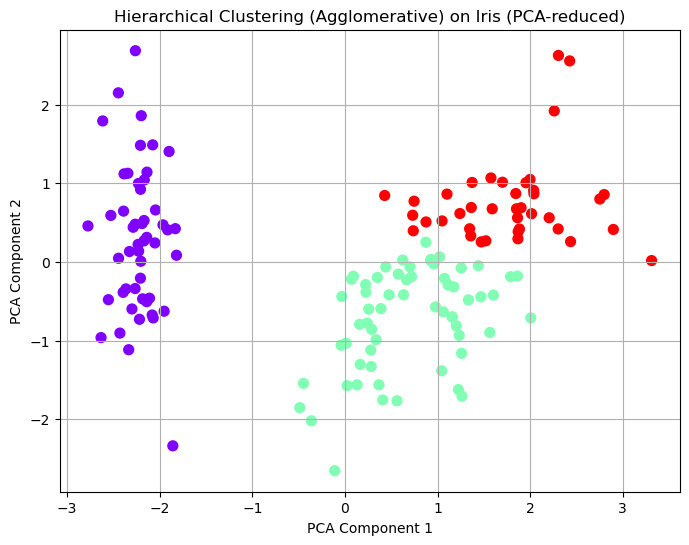

In [7]:
# --- Plot clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='rainbow', s=50)
plt.title("Hierarchical Clustering (Agglomerative) on Iris (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

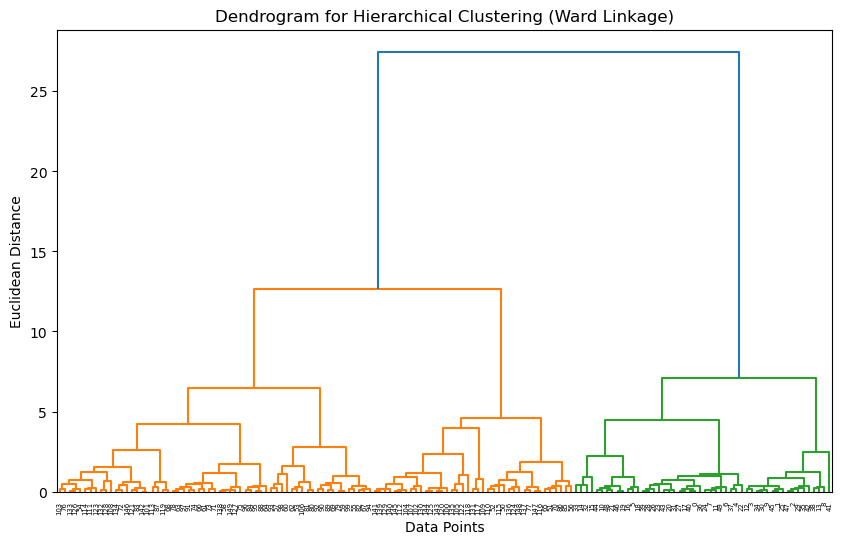

In [8]:
# --- Dendrogram ---
plt.figure(figsize=(10, 6))
linked = linkage(X_pca, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()